<a href="https://colab.research.google.com/github/Shuaib-001/Hotel-Booking-Analysis/blob/main/Project_hotel_analysis_eda_ipynb_(by_MOHD_SHUAIB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA

**Team Name** - CodeX
##### **Team Member 1 -** MOHAMMAD SHUAIB



# **Project Summary -**

Hotel business is a lucrative yet very volatile business segment. It’s dependent on multiple criteria like type of hotel, business seasons, customer segments, multiple modes of booking, amenities, services and many more. Over the past couple of decades, it saw a massive surge in terms of profit, but then global pandemic hit worldwide and almost all industry sectors observed a deprivation in their business with ‘Hotel’ sector taking a major blow. This has made many entrepreneurs and business leaders realize how important it is to be strategic and leverage data analysis for making intelligent business decisions, thereby penetrating the market deep and gain more marketshares.

By applying Exploratory Data Analysis principles and feature engineering, this study aims to explore merits of analysis on Hotels dataset that governs bookings and can help in increasing customer base. Secondary objective is to help the customers in deciding the best period to visit places while availing low accommodation cost benefits. In this project we were provided dataset containing booking information about two types of hotel and various other related booking criteria.

First step of approach involved Data Exploration and Inspection over the raw data. Second step involved Data Cleaning by handling null values, dropping irrelevant columns and rows, parsing date in string to Datetime format and adding new feature columns that can help in better decision support. Final step involved performing a comprehensive data analysis over clean data to analyze the factors that affect hotel bookings and creating Data Visualization for the same. These factors can further helps in drawing booking, pricing and other correlated trends which can further aid in predicting business at high level.

EDA will be divided into following 3 analysis:

1. Univariate analysis: Univariate analysis is the simplest of the three analyses where the data, you are analyzing is only one variable.
2. Bivariate analysis: Bivariate analysis is where you are comparing two variables to study their relationships.
3. Multivariate analysis: Multivariate analysis is similar to Bivariate analysis but you are comparing more than two variables.

# **GitHub Link -**

GitHub Link: https://github.com/Shuaib-001/Hotel-Booking-Analysis


Email ID: mohammadshuaib1811@gmail.com

# **Problem Statement**


The problem statement for the 'Hotel booking Analysis' capstone project is to perform exploratory data analysis on a dataset containing booking information for two different types of hotels: city hotel and resort hotel. The aim of this analysis is to identify important features that can affect hotel bookings and help hotel businesses make intelligent decisions to penetrate the market and gain more market share. Additionally, the project seeks to help customers in deciding the best period to visit places while availing low accommodation cost benefits. The analysis will involve data exploration, data cleaning, and comprehensive data analysis to analyze the factors that influence hotel bookings and create data visualizations to identify booking and pricing trends. The project will be divided into three different types of analysis, namely univariate analysis, bivariate analysis, and multivariate analysis. Overall, the project's objective is to provide insights that will help the hotel industry make informed decisions to improve their business performance and customer satisfaction.

#### **Define Your Business Objective?**

The dataset includes booking information for two hotels - City Hotel and Resort Hotel - containing various criteria such as booking season, time, length of stay, number of guests, parking, pricing, and market segment. The main goal is to conduct Exploratory Data Analysis to explore and scrutinize the dataset and identify significant features that can enhance bookings and help hotels penetrate the market to attract more customers. By analyzing booking and pricing trends, important insights can be derived to make intelligent business decisions. Additionally, the secondary objective is to assist customers in determining the best time to visit a place to obtain low accommodation costs.

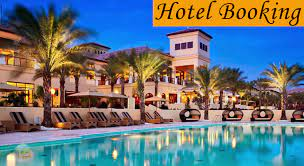

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import folium
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# csv file location
csv_file = ('/content/drive/MyDrive/Capstone Project/Hotel Bookings.csv')
# Reading the data set
data_set = pd.read_csv(csv_file)

# Creating a copy of data set
data = data_set.copy()

**Dataset First View**

     

In [ ]:
# Checking the first 5 rows of data
data.head()


In [ ]:
# Checking the bottom 5 rows of the data
data.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'We have {data.shape[0]} of rows and {data.shape[1]} columns.')

### Dataset Information

In [ ]:
# Dataset Info
#Data information. Inspecting each columns and its dtype
data.info()


In [ ]:
# Dataset Duplicate Value Count
data.duplicated().value_counts()    #True means duplicate rows


In [ ]:
# Visualizing through Count Plot
plt.figure(figsize=(10,8))
sns.countplot(x=data.duplicated())


In [ ]:
# Dropping the duplicate rows
data = data.drop_duplicates()
data.duplicated().value_counts()

In [ ]:
# Dataset reduced
data.shape

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = pd.DataFrame({'missing Values' : data.isna().sum(), 'Percentage missing Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
missing_values

In [ ]:
#rows only with missing values
rows_with_missing_values = missing_values[missing_values['missing Values'] > 0]
print(rows_with_missing_values)

In [ ]:
# Create a bar chart of the percentage of missing values
bar_chart = go.Bar(x=rows_with_missing_values.index,
                   y=rows_with_missing_values['Percentage missing Values'],
                   name='Percentage Missing Values',
                   marker=dict(color='brown'))

# Set the title and axis labels
layout = go.Layout(title='Missing Values Bar Chart',
                   xaxis=dict(title='Features'),
                   yaxis=dict(title='Percentage Missing Values'))

# Create the figure and plot the bar chart
fig = go.Figure(data=[bar_chart], layout=layout)
fig.show()

pio.write_html(fig, file='missing_values_chart.html', auto_open=True, include_plotlyjs='cdn')

So we have null values in columns - company, agent, country and children.

A) For company I will drop the column because it contains 94% null data.

B) For agent I will fill the null values with 0 assuming those rooms were booked without any agents.

C) For country I will fill the null values with object 'Others', assuming tourist belong to country other than available list.

D) For children, I will fill the null values with 0, assuming 0 children in that family.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns]
print(list(data.columns))



In [ ]:
# Dataset Describe
data.describe()

Descriptive Statistics: it provides statistical summary metrics for each numerical column, such as count, mean, standard deviation, minimum value, quartiles (25%, 50%, 75%), and maximum value. These metrics give an overview of the central tendency, dispersion, and range of the data.

 hotel booking analysis project, we can gain a comprehensive summary of the numerical data and extract valuable insights to guide further analysis, data preprocessing, or modeling tasks.

### Variables Description

**hotel** : Hotel(Resort Hotel or City Hotel)

**is_canceled** : Value indicating if the booking was canceled (1) or not (0)

**lead_time** :  * Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of arrival date

**arrival_date_week_number** : Week number of year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults** : Number of adults

**children** : Number of children

**babies** : Number of babies

**meal** : Type of meal booked. Categories are presented in standard hospitality meal packages:

**country** : Country of origin.`

**market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type** : Code for the type of room assigned to the booking.

**booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type** : Indication on if the customer made a deposit to guarantee the booking.

**agent** : ID of the travel agency that made the booking

**company** : ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type** : Type of booking, assuming one of four categories

**adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** :Number of special requests made by the customer (e.g. twin bed or high floor)*

**reservation_status** : Reservation last status, assuming one of three categories

  **Canceled** – booking was canceled by the customer

  **Check-Out** – customer has checked in but already departed

   **No-Show** – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date** : Date at which the last status was set. This variable
can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(data.apply(lambda col:col.unique()))

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Filling null values in agent with 0 assuming those rooms were booked without any agents
data["agent"].fillna(0,inplace=True)

# Filling null values in children with 0 assuming 0 children in that family
data["children"].fillna(0,inplace=True)

# Filling null values in Country with 'Other' category assuming tourist belong to country other than available list
data["country"].fillna('other',inplace = True)

In [ ]:
# Droping company column because it contains 94% null data
data.drop(['company'], axis=1, inplace=True)

# Droping rows where there is no data on adults, children, babies combined
no_guest=data[data['adults']+data['babies']+data['children']==0]
data.drop(no_guest.index, inplace=True)

In [ ]:
# Checking the null values
data.isna().sum().sort_values(ascending=False)[:5]

In [ ]:
#Parsing reservation_status date into datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')


**Adding new columns of Arrival month, Total People and Total Stay**

In [ ]:
# Parsing arrival_date_month into datetime and adding a new column with parsed month number
data['arrival_month'] = data['arrival_date_month'].apply(lambda x : datetime.strptime(x,'%B'))
data['arrival_month'] = data['arrival_month'].apply(lambda x : x.month)           #Will be used for sorting columns months wise

In [ ]:
# Add a new column to represent the day of the week for each arrival date
data['arrival_day'] = data['arrival_month'].apply(lambda x: pd.to_datetime(x).day_name())



In [ ]:
# Adding new column "total_people" by adding columns values of 'adults', 'children' and 'babies'
data['total_people'] = data['adults'] + data['children'] + data ['babies']
#Adding new column as Kids by adding two columns children and babies
data['kids']=data['children']+data['babies']

# Adding new column 'total_stay' by adding columns values of 'stays_in_weekend_nights' and 'stays_in_week_nights'
data['total_stay'] = data ['stays_in_weekend_nights'] + data ['stays_in_week_nights']



In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data.shape

Check Unique Values for each variable.

In [ ]:
#Removing the datetime datatype and unique country data
categorical_cols=list(set(data.drop(columns=['reservation_status_date','country','arrival_date_month','arrival_date_day_of_month', 'arrival_date_year']).columns)- set(data.describe()))

#Runing the for loop to know the unique values for data analysis
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(data[col].unique())}')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**EDA(Exploratory Data Analysis)**

**Chart - 1 | Which type of hotel is mostly preferred by the guests?**

In [ ]:
# Chart - 1 visualization code
#Fetching unique hotel count
booking_df = data['hotel'].value_counts()
booking_df


In [ ]:
# Plotting pie chart of unique Hotel booking %
x_axis = booking_df.plot.pie(figsize=(8,5),fontsize=20, autopct='%5.1f%%',shadow=True, explode=[0.05,0.05])

x_axis.set_title('Booking percentage in each Hotel',fontsize=19)
plt.show()

**1. Why did you pick the specific chart?**

Pie charts typically show relative proportions of different categories in a data set.

**2. What is/are the insight(s) found from the chart?**

Majority of the guest prefer City Hotel over Resort Hotel.


**3. Will the gained insights help creating a positive business impact?**

Yes, because it will help business owners in deciding on which hotel type to invest their money in to gain maximum financial leverage.

**Chart - 2 | From which country most guests are coming**

In [ ]:
# Chart - 2 visualization code
# Counting the guests from various countries.
country_data = data['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]


# Visualizing by plotting the graph
plt.figure(figsize=(10,8))
sns.barplot(x=country_data['country'],y=country_data['count of guests'])
plt.xlabel('Country',fontsize=20)
plt.ylabel('Number of guests',fontsize=20)
plt.title("Number of guests from diffrent Countries",fontsize=20)
plt.show()



**Abbreviations for countries**

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Itlay

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands


In [ ]:
country_data = px.choropleth(country_data, locations = country_data['country'],color = country_data['count of guests'], hover_name = country_data['country'])
country_data .show()

**1. Why did you pick the specific chart?**

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

**2. What is/are the insight(s) found from the chart?**

From plotted bar plot, its evident that most of guest visiting these City hotels and Resort hotels are from Portugal and other European countries namely Britain, France, Spain and Germany. Among which Portugal takes the lion's share with more than 25000 customers.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because now the hotel owners can try to understand the reason as to why majority of the customers are from Portugal. The countries where the number is low, whether it's competitor is providing better services there. Since Portugal is occupying a major chunk of the chart, The business owner may now do targeted marketing by applying the 80:20 rule to maximize their profits.

**Chart - 3  Which is the most preferred room type by the customers?**

In [ ]:
# Chart - 3 visualization code
# Setting plotsize
plt.figure(figsize=(14,6))

# Plotting
sns.countplot(x=data['assigned_room_type'],order=data['assigned_room_type'].value_counts().index)
#  setting xlabel for the plot
plt.xlabel('Room Type',fontsize=20)
# setting y label for the plot
plt.ylabel('Count of Room Type',fontsize=20)
# setting title for the plot
plt.title("Most preferred Room type",fontsize=25)

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

Most demanded room type is A, followed by D and E.

##### 3. Will the gained insights help creating a positive business impact?

From this graph hoteliers understand the preferences of their guests.It indicates which room types are in high demand, that helps hoteliers to optimize their inventory and pricing strategy accordingly and furthermore they can focus on promoting and enhancing the features of these room types to attract more booking that potencially leads to higher revenue generation.

Hotels should increase the no. of room types A to maximise revenue.

**Chart - 4 Which type of food is mostly preferred by the guests?**

In [ ]:
# Chart - 4 visualization code
# Plotting the chart of preferred meal type
plt.figure(figsize=(12,6))
sns.countplot(x=data['meal'])
plt.xlabel('Meal Type',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title("Preferred Meal Type",fontsize=15)


Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

A) The most preferred meal type by the guests is BB(Bed and Breakfast)

B) HB- (Half Board) and SC- (Self Catering) are equally preferred.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, with the gained insights hotel owner may be able to switch to dynamic pricing models for their meal plans. Those meal plan with the highest demand can be charged little bit higher with added features, while those with less demand can be charged a bit lower, to attract the customers to avail that meal type.



**Chart - 5 Which year had the highest bookings?**

In [ ]:
# Chart - 5 visualization code
# Setting the plot size
plt.figure(figsize=(10,6))

# Plotting with countplot
list1=['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']
arrival_overview = data[list1]
sns.countplot(data =arrival_overview, x = 'arrival_date_year', hue = 'hotel').set_title('Customer arrival by year',fontsize=20)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of bookings',fontsize = 14)
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

As we can see that 2016 was the year where number of hotel booking was highest followed by total bookings in 2017 and 2015.

Overall City hotel had the highest number of bookings compared with Resort Hotel.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, Hotel owners should divert more of their resources on City hotels to maximise their profits, at the same time can try to attend to existing customers of Resort hotel.

**Chart - 6 In which month most of the bookings happened?**

In [ ]:
# Chart - 6 visualization code
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df = data.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Creating list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df


In [ ]:
# Setting plot size
plt.figure(figsize=(15,6))

# Plotting lineplot on x-months & y-booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# Setting title for the plot
plt.title('Number of bookings across each month',fontsize=25)
# Setting x label
plt.xlabel('Month',fontsize=20)
# Setting y label
plt.ylabel('Number of bookings',fontsize=20)

##### 1. Why did you pick the specific chart?

Line charts are used to represent the relation between two data X and Y on a different axis.

##### 2. What is/are the insight(s) found from the chart?

Peak visiting season is from mid June to August because of summer breaks in Europe
Off season is from November to February because of cold weather throughout Europe

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the booking patterns across month helps the owners to predict their revenue more accurately By identifying the months with higher booking volumes and they can adjust their revenue management strategies.

**Chart - 7 Which Distribution channel is mostly used for hotel bookings?**

In [ ]:
# Chart - 7 visualization
# Creating labels
labels = data['distribution_channel'].value_counts().index.tolist()

# Creating new df of distribution channel
distribution_channel_df= data['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

# Adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/data.shape[0],1)

# Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

# Plotting the pie chart
data['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)

# Setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')


##### 1. Why did you pick the specific chart?

Pie charts typically show relative proportions of different categories in a data set.

##### 2. What is/are the insight(s) found from the chart?

As we can see, Resort hotel and City hotel are getting most of bookings from travel agency and tour operators. May be in future they will be monopolize the entire booking channel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence hotel owners should promote more in different market segments to beat the monopoly condition. They may also find ways to develop a strong partnership with the TA/TO to increase their bookings count.

**Chart - 8 What is the percentage of cancellation?**

In [ ]:
# Chart - 8 visualisation
# Plotting the pie chart
data['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
# Setting the title
plt.title("Cancellation and non Cancellation")

**0 = Not cancelled**

**1 = Cancelled**

##### 1. Why did you pick the specific chart?

Pie charts typically show relative proportions of different categories in a data set.

##### 2. What is/are the insight(s) found from the chart?

27.5 % of the bookings were cancelled, while 72.5% were not cancelled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel owners should try to find out why did the customers, who has booked earlier, went on to cancel the booking. By taking their feedback through voice call or email, companies may know the reason. Accordingly they may change their strategy to counter such scenarios in the future.

**Chart - 9 Which Agent made the most bookings?**

In [ ]:
# Chart - 9 visualization code
# Return highest bookings made by agents
highest_bookings = data.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

# As agent 0 was a NAN value, we replaced it with 0 which indicates no bookings. So decided to drop.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)

# Taking into consideration top 10 agents
top_ten_highest_bookings = highest_bookings[:10]

top_ten_highest_bookings

In [ ]:
# Plotting the graph

plt.figure(figsize=(16,6))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No',fontsize=20)
plt.ylabel('Number of Bookings',fontsize=20)
plt.title("Most Bookings Made by the agent",fontsize=25)

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

Agent ID No. 9.0 made most of the bookings, followed by 240.0

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight, hotel owners may incentivise both the top two agents, while at the same time motivate others by organizing competitions.

**Chart - 10 What is the percentage of repeated guests?**

In [ ]:
# Chart - 10 visualization code
# Plotting a pie chart
data['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)
# Creating the title
plt.title(" Percentage of repeated guests",fontsize=20)

**0= Not Repeated**

**1=Repeated**

##### 1. Why did you pick the specific chart?

Pie charts typically show relative proportions of different categories in a data set

##### 2. What is/are the insight(s) found from the chart?

Repeated guests are very few which only comprise of 3.9 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel owners, in order to retain the guests should take feedbacks from them and try to improve upon the services or provide something unique than their competitors

**Chart - 11 What is the Optimal length of stay in both types of hotels ?**

In [ ]:
# Chart - 11 visualization code

# Creating a not cancelled dataframe
not_cancelled_df = data[data['is_canceled'] == 0]
# Creating a hotel stay dataframe
hotel_stay_df1 = not_cancelled_df[not_cancelled_df['total_stay'] <= 15]  #Visualizing pattern till 15days stay

In [ ]:
# Setting plot size and plotting barchart
plt.figure(figsize = (15,6))
sns.countplot(x = hotel_stay_df1['total_stay'], hue = hotel_stay_df1['hotel'])

# Adding the label of the chart
plt.title('Preferred stay length in each Hotel',fontsize = 20 )
plt.xlabel('Stay length in days', fontsize=14)
plt.ylabel("Count of tourist's stay", fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.



##### 2. What is/are the insight(s) found from the chart?

Guest prefer 1-4 days when staying in City Hotels.

Guest prefer 1-4 days when staying in Resort Hotels as well, while 7 days stay is also a popular choice among guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the above insight, hotel owners may bring in more packages targeting the 1-4 days group. In case of Resort hotel, 7 days packages could be continued looking at their popularity among customers.

**Chart - 12 - Which distribution channel contributed more to ADR in order to increase the income ?**

In [ ]:
# Chart - 12 visualization code
# Groupby distribution channel and hotel
bar_chart = data.groupby(['hotel','distribution_channel'])['adr'].count().unstack().transpose().fillna(0)
bar_chart.drop('Undefined',axis =0, inplace = True)
# Displaying the bar_chart DataFrame
bar_chart


In [ ]:
# Plotting bar chart for distribution channel of both hotels by average daily rate
ax =  bar_chart.plot(kind = "barh",figsize=(10,6))
ax.legend(bbox_to_anchor=(1,1))

# Adding the label of the chart
ax.yaxis.set_label_text("Market segment", fontsize = 14)
ax.xaxis.set_label_text("Average daily Rate", fontsize = 14)
ax.set_title("Market segment wise ADR", fontsize = 20)

# Displaying the chart
plt.show()

**Corporate** - These are corporate hotel booking companies which makes bookings
possible.

**GDS** - A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live products, price and availability data to travel agents and online booking engines, and allows for automated transactions.

**Direct**- The bookings which are directly made with the respective hotels.

**TA/TO**- The bookings which are made through travel agents or tour operators.

##### 1. Why did you pick the specific chart?

A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

##### 2. What is/are the insight(s) found from the chart?

From the chart is clear that :

'Direct' and 'TA/TO' channel has almost equally contributed in ADR in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'. While 'TA/TO' dominates the chart in terms of total ADR.

GDS has slightly contributed in adr in 'City Hotel' type.

Corporate booking channel has also contributed to the ADR.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing adr for this segment helps hotels evaluate the effectiveness of their pricing strategies on different booking channels and identify ant comission-related impact on rates.

Hotel owners should tie up with TA/TO partners, to increase their market share.

#### Chart - 13 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Aggregation of guest's monthly bookings which were checked out
not_cancelled_df = data[data['is_canceled'] == 0]
checked_out = not_cancelled_df.groupby(['arrival_month'], as_index=False).agg({'is_canceled':'count',
                                                                     'adr':'mean',
                                                                     'total_stay':'sum',
                                                                     'required_car_parking_spaces':'sum',
                                                                     'is_repeated_guest':'sum'})

# Guest who cancelled their booking
canceled_df = data.loc[data['reservation_status']=='Canceled',['arrival_month','reservation_status']]
canceled_df.replace('Canceled',1, inplace=True)
canceled = canceled_df.groupby(['arrival_month'], as_index=False)['reservation_status'].sum()

In [ ]:

# Merging Cancelled and Non-cancelled dataset based on Month
merge_df = pd.merge(checked_out,canceled, how = 'inner', on = ['arrival_month'])
merge_df.rename(columns={'is_canceled':'Booking Count',
                         'adr':'Price',
                         'total_stay':'Total stay',
                         'reservation_status':'Cancellation',
                         'is_repeated_guest':'Repeated Customer',
                         'required_car_parking_spaces':'Parking Spaces'},inplace=True)

In [ ]:

# Plotting correlation heatmap for different booking criteria
plt.figure(figsize=(14,7))
sns.heatmap(merge_df[['Booking Count','Price','Total stay','Cancellation','Repeated Customer','Parking Spaces']].corr(),vmin=-1,annot=True, annot_kws={"size":13})

plt.title('Co-relation of the columns', fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11,rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of th

##### 2. What is/are the insight(s) found from the chart?

There is a high positive correlation between Booking and Pricing, Total Stay, Cancellations and Parking spaces, where as negative correlation with Repeated guests

Increase in Pricing leads to repeated Customers not visiting again

There is firm correlation between Parking space and Cancellation inferring that people are more likely to cancel their booking if Parking space is not available.


3. Will the gained insights help creating a positive business impact?

This pearson's correlation shows the linear relationship between two variables.It is emphasized that correlation does not imply causation but it can reveal valuable insights for decision making.

The correlation analysis of hotel booking reveals valuable insights and pattern in data by understanding relationship between different factors.

## **5. Solution to Business Objective**

#### Revenue Optimization: One of the primary objectives of hotel booking analysis is to maximize revenue. By analyzing booking data, hotels can identify pricing patterns, demand trends, and customer preferences to optimize pricing strategies, implement dynamic pricing models, and identify opportunities for upselling or cross-selling additional services.

* Customer Experience Enhancement: Understanding customer booking behaviors, preferences, and satisfaction levels is crucial for delivering exceptional guest experiences. By analyzing booking data, hotels can identify patterns and trends that influence customer satisfaction and tailor their services accordingly. This includes personalizing offerings, improving amenities, and providing a seamless and personalized booking process.

* Operational Efficiency: Hotel booking analysis helps hotels optimize their operations by analyzing booking patterns, occupancy rates, and resource utilization. By identifying peak periods, demand fluctuations, and occupancy trends, hotels can effectively manage their inventory, optimize staffing levels, and streamline operations. This improves overall operational efficiency and reduces costs.

* Marketing and Sales Strategy Optimization: Analyzing booking data provides insights into the effectiveness of marketing and sales strategies. Hotels can identify the most successful marketing channels, campaigns, and promotions by analyzing booking patterns and customer acquisition sources. This allows hotels to optimize their marketing efforts, allocate budgets efficiently, and target the right audience with personalized messages.

* Competitive Advantage: Hotel booking analysis enables hotels to stay competitive by monitoring market trends, benchmarking performance against competitors, and identifying emerging market opportunities. By analyzing booking data and customer reviews, hotels can identify gaps in the market, differentiate their offerings, and make data-driven decisions to gain a competitive edge.

* Risk Management and Fraud Detection: Hotel booking analysis helps identify potential risks and fraudulent activities. By monitoring booking patterns, detecting anomalies, and analyzing customer behavior, hotels can implement effective risk management strategies, detect fraud, and protect their business and customers.



# **Conclusion**


*   **Majority (61%) of the guests prefer City Hotel over Resort Hotel. Most of guest visiting these hotels are from European countries namely Portugal, Britain, France, Spain and Germany totaling to 75% of total booking count**.

*   **Majority of the guests are couple type and city hotel is most preferred hotel.Resort hotel guests demand more parking spaces than city hotel guests**  

*   **2016 observed the highest booking reservations. From Booking trend it can be inferred that Peak visiting season is from mid June to August because of summer breaks in Europe while November to February is off season because of freezing cold weather throughout Europe.**

*   **Around 11.5% of total reservations throughout year are coming from August whereas January has the least reservation of mere 5%. Guests can consider visiting these hotels during month of June and September to enjoy decent weather with almost full availability of hotels accommodation.**

*  **Inspecting different market segments, it was concluded that travel agency holds monopoly as both hotels are getting the most of booking from travel agency (around 79%). Hotel owners should consider promoting their hotels more in different market segments to penetrate market more.**

*   **Interestingly, most of the Cancellations for both Hotels are from Travel agency (TA/TO) segment inferring that it is volatile market segment. Also, a very small proportion of guest booking via Travel agency do not showing up at Hotel. Guest visiting both Hotels directly and via Corporate are less likely to cancel their booking.**

*   **There is high positive correlation between Booking, Pricing, Total Stay, Cancellations and Parking spaces whereas negative correlation with Repeated guests. With increase in Booking --> Pricing, Total stay and Parking spaces occupation increases but increase in Pricing leads to repeated Customers not visiting again.**

*   **There is firm correlation between Parking space and Cancellation inferring that people are more likely to cancel their booking if Parking space is not available.**

*   **Only 3.9 % people revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.**
*   **Ideally guest prefer to stay 1-4 days in both hotels but 7 days stay at Resort hotel is also a popular choice among guests.**










